# TD2: Deep learning

In this TD, you must modify this notebook to answer the questions. To do this,

1. Fork this repository
2. Clone your forked repository on your local computer
3. Answer the questions
4. Commit and push regularly

The last commit is due on Wednesday, December 4, 11:59 PM. Later commits will not be taken into account.

Install and test PyTorch from  https://pytorch.org/get-started/locally.

In [1]:
%pip install torch torchvision


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



To test run the following code

In [2]:
import torch

N, D = 14, 10
x = torch.randn(N, D).type(torch.FloatTensor)
print(x)

from torchvision import models

alexnet = models.alexnet()
print(alexnet)

tensor([[-0.9795,  0.7523,  0.8343, -0.0598,  0.3667, -2.0467, -0.6454,  0.5932,
         -1.4877, -1.4277],
        [ 0.2857,  1.2235, -1.1033, -0.2778, -1.5773, -1.9997, -0.8219, -0.4121,
         -0.2512, -0.9691],
        [ 0.4293, -0.6780, -0.6763, -0.5158,  1.7610,  0.8322, -1.4890,  0.6857,
          0.3931, -1.7304],
        [ 0.2365, -0.2215,  0.0878, -1.3077, -2.2274,  0.0471,  0.4229,  0.2999,
          1.6608, -0.4597],
        [-0.7914, -0.6193,  0.3148,  0.2495, -0.8671, -0.1750, -0.2270,  0.0452,
         -0.8493, -0.4726],
        [-0.2461,  0.5174,  0.0432, -1.6498,  0.1466,  0.4093, -0.4276,  0.9521,
          2.0915,  1.0765],
        [ 0.6324,  0.6887,  0.3230,  1.0649, -1.7234, -0.5458, -0.2392,  0.3203,
         -0.8843,  0.7544],
        [-0.2075,  0.5479, -1.6141,  1.3578, -0.8545, -0.0216, -0.3450, -0.0836,
          0.2637,  0.8819],
        [ 0.3133,  1.3201, -0.6707,  0.0446, -0.1030,  0.2500,  0.9326,  0.6421,
          1.0294, -0.1829],
        [ 1.0690, -

## Exercise 1: CNN on CIFAR10

The goal is to apply a Convolutional Neural Net (CNN) model on the CIFAR10 image dataset and test the accuracy of the model on the basis of image classification. Compare the Accuracy VS the neural network implemented during TD1.

Have a look at the following documentation to be familiar with PyTorch.

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

You can test if GPU is available on your machine and thus train on it to speed up the process

In [3]:
import torch

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("CUDA is not available.  Training on CPU ...")
else:
    print("CUDA is available!  Training on GPU ...")

CUDA is not available.  Training on CPU ...


Next we load the CIFAR10 dataset

In [4]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# choose the training and test datasets
train_data = datasets.CIFAR10("data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10("data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# specify the image classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

Files already downloaded and verified
Files already downloaded and verified


CNN definition (this one is an example)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Loss function and training using SGD (Stochastic Gradient Descent) optimizer

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss


for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss
        

Epoch: 0 	Training Loss: 43.975669 	Validation Loss: 38.347677
Validation loss decreased (inf --> 38.347677).  Saving model ...
Epoch: 1 	Training Loss: 34.997114 	Validation Loss: 31.994015
Validation loss decreased (38.347677 --> 31.994015).  Saving model ...
Epoch: 2 	Training Loss: 31.149257 	Validation Loss: 29.776703
Validation loss decreased (31.994015 --> 29.776703).  Saving model ...
Epoch: 3 	Training Loss: 28.815007 	Validation Loss: 27.427899
Validation loss decreased (29.776703 --> 27.427899).  Saving model ...
Epoch: 4 	Training Loss: 27.052385 	Validation Loss: 26.452557
Validation loss decreased (27.427899 --> 26.452557).  Saving model ...
Epoch: 5 	Training Loss: 25.561286 	Validation Loss: 25.019063
Validation loss decreased (26.452557 --> 25.019063).  Saving model ...
Epoch: 6 	Training Loss: 24.222937 	Validation Loss: 24.275458
Validation loss decreased (25.019063 --> 24.275458).  Saving model ...
Epoch: 7 	Training Loss: 23.071588 	Validation Loss: 23.836704
Valid

Does overfit occur? If so, do an early stopping.

Yes, overfitting occurs.
- The validation loss consistently decreases from epoch 0 to epoch 15, showing the model is learning and generalizing well initially.
- Starting from epoch 16, the validation loss begins to stagnate and fluctuate, with occasional improvements.
- From epoch 17 onward, validation loss increases steadily, indicating overfitting as the training loss continues to decrease.

- The lowest validation loss is observed at epoch 15 (21.093654), after which performance starts to degrade.
- Overfitting Trend: The divergence between training and validation losses beyond epoch 15 indicates the model is overfitting the training data.

- Do early stopping at epoch 16 to prevent overfitting and preserve the best model.

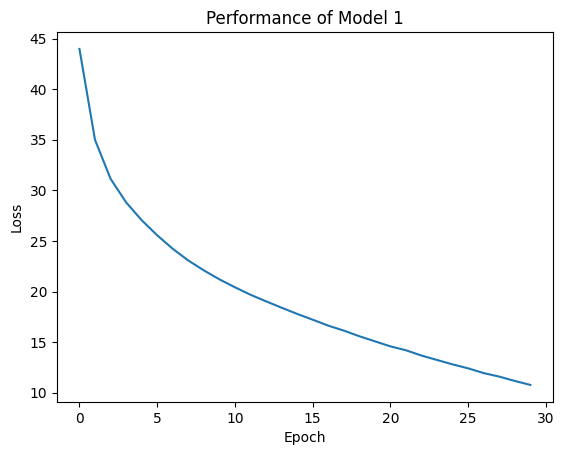

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

Now loading the model with the lowest validation loss value


In [8]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 21.151382

Test Accuracy of airplane: 66% (666/1000)
Test Accuracy of automobile: 80% (803/1000)
Test Accuracy of  bird: 59% (599/1000)
Test Accuracy of   cat: 49% (491/1000)
Test Accuracy of  deer: 55% (550/1000)
Test Accuracy of   dog: 44% (443/1000)
Test Accuracy of  frog: 78% (784/1000)
Test Accuracy of horse: 63% (636/1000)
Test Accuracy of  ship: 77% (777/1000)
Test Accuracy of truck: 65% (659/1000)

Test Accuracy (Overall): 64% (6408/10000)


Build a new network with the following structure.

- It has 3 convolutional layers of kernel size 3 and padding of 1.
- The first convolutional layer must output 16 channels, the second 32 and the third 64.
- At each convolutional layer output, we apply a ReLU activation then a MaxPool with kernel size of 2.
- Then, three fully connected layers, the first two being followed by a ReLU activation and a dropout whose value you will suggest.
- The first fully connected layer will have an output size of 512.
- The second fully connected layer will have an output size of 64.

Compare the results obtained with this new network to those obtained previously.

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN architecture
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        
        # Convolutional layers with ReLU activations and MaxPooling
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Output: 16 channels
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Output: 32 channels
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Output: 64 channels
        
        # MaxPool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)  # Input size based on image dimensions
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)  # Assuming 10 classes for the output
        
        # Dropout layers
        self.dropout = nn.Dropout(0.5)  # Dropout with probability of 0.5

    def forward(self, x):
        # Pass through convolutional layers with ReLU activations and MaxPooling
        x = self.pool(F.relu(self.conv1(x)))  # After conv1: 16 channels
        x = self.pool(F.relu(self.conv2(x)))  # After conv2: 32 channels
        x = self.pool(F.relu(self.conv3(x)))  # After conv3: 64 channels
        
        # Flatten the output of the last convolutional layer
        x = x.view(-1, 64 * 4 * 4)  
        
        # Fully connected layers with ReLU and Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after first fully connected layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after second fully connected layer
        
        # Final output layer
        x = self.fc3(x)
        
        return x


# Create the model
model_2 = Net_2()
print(model_2)

# Move model to GPU if available
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    model.cuda()


Net_2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model_2.parameters(), lr=0.01)  # specify optimizer

n_epochs_2 = 30  # number of epochs to train the model
train_loss_list_2 = []  # list to store loss to visualize
valid_loss_min_2 = np.Inf  # track change in validation loss

for epoch in range(n_epochs_2):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model_2.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model_2(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model_2.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model_2(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list_2.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min_2:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min_2, valid_loss
            )
        )
        torch.save(model_2.state_dict(), "model_cifar_2.pt")
        valid_loss_min_2 = valid_loss

Epoch: 0 	Training Loss: 45.389846 	Validation Loss: 41.777527
Validation loss decreased (inf --> 41.777527).  Saving model ...
Epoch: 1 	Training Loss: 39.424652 	Validation Loss: 35.060819
Validation loss decreased (41.777527 --> 35.060819).  Saving model ...
Epoch: 2 	Training Loss: 35.046248 	Validation Loss: 32.135539
Validation loss decreased (35.060819 --> 32.135539).  Saving model ...
Epoch: 3 	Training Loss: 32.571120 	Validation Loss: 29.923746
Validation loss decreased (32.135539 --> 29.923746).  Saving model ...
Epoch: 4 	Training Loss: 30.437492 	Validation Loss: 27.588401
Validation loss decreased (29.923746 --> 27.588401).  Saving model ...
Epoch: 5 	Training Loss: 28.696167 	Validation Loss: 26.766404
Validation loss decreased (27.588401 --> 26.766404).  Saving model ...
Epoch: 6 	Training Loss: 27.121808 	Validation Loss: 24.613978
Validation loss decreased (26.766404 --> 24.613978).  Saving model ...
Epoch: 7 	Training Loss: 25.725125 	Validation Loss: 23.538336
Valid

- Model 2 starts with relatively high validation losses but steadily decreases, achieving better performance in terms of validation loss. The best validation loss of 15.28 is obtained at epoch 24, but as with Model 1, validation loss becomes more unstable from epoch 24 onwards. Training loss continues to decrease with each epoch.

- Model 2 showed a stable decrease in validation loss, achieving better performance than Model 1 in the early epochs (at least up to epoch 24). However, from epoch 24 onwards, validation loss also became more volatile, which could be a sign of long-term overfitting.

- Model 2 seems to work better for the first 24 epochs, with a lower and more stable loss of validation than the Model 1.

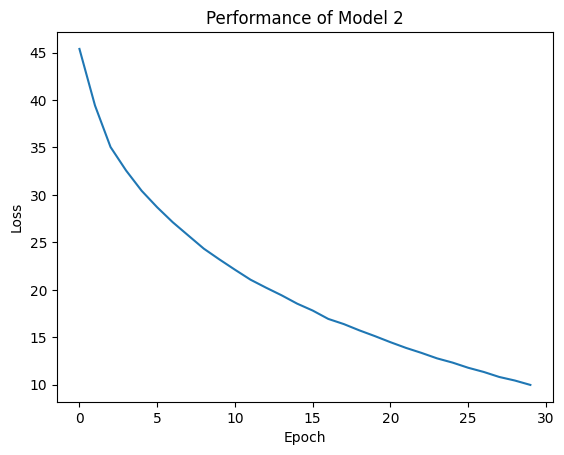

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs_2), train_loss_list_2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 2")
plt.show()

In [22]:
model_2.load_state_dict(torch.load("./model_cifar_2.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model_2.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 15.510981

Test Accuracy of airplane: 82% (820/1000)
Test Accuracy of automobile: 80% (803/1000)
Test Accuracy of  bird: 64% (641/1000)
Test Accuracy of   cat: 48% (480/1000)
Test Accuracy of  deer: 70% (701/1000)
Test Accuracy of   dog: 66% (667/1000)
Test Accuracy of  frog: 77% (776/1000)
Test Accuracy of horse: 80% (804/1000)
Test Accuracy of  ship: 86% (860/1000)
Test Accuracy of truck: 80% (808/1000)

Test Accuracy (Overall): 73% (7360/10000)


- Test loss (Loss):

Model 2 has a significantly lower test loss (15.51) compared with Model 1 (21.15). This suggests that Model 2 is better at generalizing to test data.

- Overall accuracy:

Model 2 has a better overall accuracy of 73% versus 64% for Model 1. This shows that Model 2 is better at classifying the test data.

Model 2 excels particularly in classes such as Airplane (82%) , Ship (86%), Horse (80%), and Truck (80%). It also has better accuracy than the Model 1 in all classes. 

- Conclusion : 

Model 2 outperforms Model 1 in terms of overall accuracy and test loss. It is better at classifying a wider range of classes, and has better generalization capability on test data.

## Exercise 2: Quantization: try to compress the CNN to save space

Quantization doc is available from https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic
        
The Exercise is to quantize post training the above CNN model. Compare the size reduction and the impact on the classification accuracy 


The size of the model is simply the size of the file.

In [140]:
import os

classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

# Define the function to print the size of the model
def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size

# Define the evaluation function to get class-wise accuracy
def evaluate_model_classwise(model, data_loader, num_classes,classes):
    model.eval()
    correct_per_class = [0] * num_classes
    total_per_class = [0] * num_classes

    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            for c in range(num_classes):
                total_per_class[c] += (labels == c).sum().item()
                correct_per_class[c] += ((predicted == labels) & (labels == c)).sum().item()

    accuracy_per_class = [correct / total if total > 0 else 0 for correct, total in zip(correct_per_class, total_per_class)]
 
    # Print accuracy per class
    print("\nAccuracy per Class:")
    for i, acc in enumerate(accuracy_per_class):
        print(f"Class {classes[i]}: {acc:.2%} ({correct_per_class[i]}/{total_per_class[i]})")

    return accuracy_per_class

# Load the pre-trained model
model = model_2
model.load_state_dict(torch.load('model_cifar_2.pt'))
model.eval()

# Evaluate the accuracy of the initial model
#initial_accuracy_per_class = evaluate_model_classwise(model, test_loader, num_classes=10,class_names=classes)
#print("Initial Model Accuracy per Class:")
print("Evaluating Initial Model...")
initial_accuracy_per_class = evaluate_model_classwise(model, test_loader, 10, classes)
overall_initial_accuracy = sum(initial_accuracy_per_class) / len(initial_accuracy_per_class)
print("\nInitial Model Overall Accuracy: {:.2%}".format(overall_initial_accuracy))
#for i, acc in enumerate(initial_accuracy_per_class):
    #print("Class {}: {:.2%}".format(i, acc))
#print("Initial Model Accuracy: {:.2%}".format(sum(initial_accuracy_per_class)/10))

# Quantize the model
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)

# Evaluate the accuracy of the quantized model
#quantized_accuracy_per_class = evaluate_model_classwise(quantized_model, test_loader, num_classes=10,class_names=classes)
#print("\nQuantized Model Accuracy per Class:")
#for i, acc in enumerate(quantized_accuracy_per_class):
#    print("Class {}: {:.2%}".format(i, acc))
#print("Quantized Model Accuracy: {:.2%}".format(sum(quantized_accuracy_per_class)/10))

print("\nEvaluating Quantized Model...")
quantized_accuracy_per_class = evaluate_model_classwise(quantized_model, test_loader, 10, classes)
overall_quantized_accuracy = sum(quantized_accuracy_per_class) / len(quantized_accuracy_per_class)
print("\nQuantized Model Overall Accuracy: {:.2%}".format(overall_quantized_accuracy))

# Print the size reduction
initial_size = print_size_of_model(model, "fp32")
quantized_size = print_size_of_model(quantized_model, "int8")
size_reduction = (initial_size - quantized_size) / initial_size * 100
print("\nSize Reduction: {:.2f}%".format(size_reduction))

Evaluating Initial Model...

Accuracy per Class:
Class airplane: 82.00% (820/1000)
Class automobile: 80.30% (803/1000)
Class bird: 64.10% (641/1000)
Class cat: 48.00% (480/1000)
Class deer: 70.10% (701/1000)
Class dog: 66.70% (667/1000)
Class frog: 77.60% (776/1000)
Class horse: 80.40% (804/1000)
Class ship: 86.00% (860/1000)
Class truck: 80.80% (808/1000)

Initial Model Overall Accuracy: 73.60%

Evaluating Quantized Model...

Accuracy per Class:
Class airplane: 82.10% (821/1000)
Class automobile: 80.40% (804/1000)
Class bird: 63.80% (638/1000)
Class cat: 48.20% (482/1000)
Class deer: 70.50% (705/1000)
Class dog: 67.10% (671/1000)
Class frog: 78.00% (780/1000)
Class horse: 80.30% (803/1000)
Class ship: 86.10% (861/1000)
Class truck: 80.90% (809/1000)

Quantized Model Overall Accuracy: 73.74%
model:  fp32  	 Size (KB): 2330.946
model:  int8  	 Size (KB): 659.806

Size Reduction: 71.69%


For each class, compare the classification test accuracy of the initial model and the quantized model. Also give the overall test accuracy for both models.

The model was reduced by 71.69% for the size even the performance of the model doesn't change it is the same for both .

Try training aware quantization to mitigate the impact on the accuracy (doc available here https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic)

## Exercise 3: working with pre-trained models.

PyTorch offers several pre-trained models https://pytorch.org/vision/0.8/models.html        
We will use ResNet50 trained on ImageNet dataset (https://www.image-net.org/index.php). Use the following code with the files `imagenet-simple-labels.json` that contains the imagenet labels and the image dog.png that we will use as test.


In [106]:
! curl -o ~/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth https://download.pytorch.org/models/resnet50-0676ba61.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 97.7M  100 97.7M    0     0  38.0M      0  0:00:02  0:00:02 --:--:-- 38.1M


Predicted class is: Golden Retriever


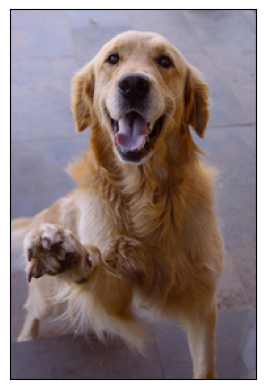

In [115]:
import json
from PIL import Image

# Choose an image to pass through the model
test_image = "dog.png"

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

model_path = "/Users/youcefkessi/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth" # I have download it.

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
model.load_state_dict(torch.load(model_path))
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

Experiments:

Study the code and the results obtained. Possibly add other images downloaded from the internet.

What is the size of the model? Quantize it and then check if the model is still able to correctly classify the other images.

Experiment with other pre-trained CNN models.

    


I add other images downloaded from the internet and I use the resnet50 pre-trained model.

In [108]:
list_Img = ["car.webp", "pizza.webp","ball.webp","Basketball.jpeg","Siamois.jpeg","bottle.jpg"]  

def testing_image(test_image, model):
    
    image = Image.open(test_image)
    
    image = data_transform(image).unsqueeze(0) 
    
    model.eval()
    out = model(image)
    predicted_class= labels[out.argmax()]
    print(f"Predicted class for {test_image} is: {predicted_class}")

for test_image in list_Img:
    testing_image(test_image, model)


Predicted class for car.webp is: race car
Predicted class for pizza.webp is: pizza
Predicted class for ball.webp is: soccer ball
Predicted class for Basketball.jpeg is: basketball
Predicted class for Siamois.jpeg is: Siamese cat
Predicted class for bottle.jpg is: wine bottle


In [138]:
print_size_of_model(model, "fp32")

model:  fp32  	 Size (KB): 102523.238


102523238

In [137]:
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(quantized_model, "int8")

model:  int8  	 Size (KB): 96379.996


96379996

In [111]:
for test_image in list_Img:
    testing_image(test_image,quantized_model)

Predicted class for car.webp is: race car
Predicted class for pizza.webp is: pizza
Predicted class for ball.webp is: soccer ball
Predicted class for Basketball.jpeg is: basketball
Predicted class for Siamois.jpeg is: Siamese cat
Predicted class for bottle.jpg is: wine bottle


The Initial and Quantized versions of the Model yield identical results. However, the storage savings are minimal, decreasing only slightly from 103 MB to 96 MB.

After quantize it, the model is still able to correctly classify the other images.

I used other pre-trained CNN model : GoogLeNet

In [118]:
! curl -o ~/.cache/torch/hub/checkpoints/googlenet-1378be20.pth https://download.pytorch.org/models/googlenet-1378be20.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49.7M  100 49.7M    0     0  25.8M      0  0:00:01  0:00:01 --:--:-- 25.9M


In [120]:
model3_path = "/Users/youcefkessi/.cache/torch/hub/checkpoints/googlenet-1378be20.pth" # I have download it.

model3 = models.googlenet(pretrained=True)

model3.load_state_dict(torch.load(model3_path))

for test_image in list_Img:
    testing_image(test_image,model3)

Predicted class for car.webp is: race car
Predicted class for pizza.webp is: pizza
Predicted class for ball.webp is: soccer ball
Predicted class for Basketball.jpeg is: basketball
Predicted class for Siamois.jpeg is: Siamese cat
Predicted class for bottle.jpg is: wine bottle


In [142]:
print_size_of_model(model3, "fp32")

model:  fp32  	 Size (KB): 26654.254


26654254

In [133]:
quantized_model3 = torch.quantization.quantize_dynamic(model3, dtype=torch.qint8)

In [134]:
for test_image in list_Img:
    testing_image(test_image,quantized_model3)

Predicted class for car.webp is: race car
Predicted class for pizza.webp is: pizza
Predicted class for ball.webp is: soccer ball
Predicted class for Basketball.jpeg is: basketball
Predicted class for Siamois.jpeg is: Siamese cat
Predicted class for bottle.jpg is: wine bottle


In [141]:
print_size_of_model(quantized_model3, "int8")

model:  int8  	 Size (KB): 23583.076


23583076

The Initial and Quantized versions of GoogleNet yield identical results. However, the storage savings are minimal, decreasing only slightly from 26 MB to 23 MB.

After quantize it, the model is still able to correctly classify the other images.

I have the same results with ResNet50 and GoogLeNet.

## Exercise 4: Transfer Learning
    
    
For this work, we will use a pre-trained model (ResNet18) as a descriptor extractor and will refine the classification by training only the last fully connected layer of the network. Thus, the output layer of the pre-trained network will be replaced by a layer adapted to the new classes to be recognized which will be in our case ants and bees.
Download and unzip in your working directory the dataset available at the address :
    
https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Execute the following code in order to display some images of the dataset.

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=0
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



Now, execute the following code which uses a pre-trained model ResNet18 having replaced the output layer for the ants/bees classification and performs the model training by only changing the weights of this output layer.

In [ ]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)


Experiments:
Study the code and the results obtained.

Modify the code and add an "eval_model" function to allow
the evaluation of the model on a test set (different from the learning and validation sets used during the learning phase). Study the results obtained.

Now modify the code to replace the current classification layer with a set of two layers using a "relu" activation function for the middle layer, and the "dropout" mechanism for both layers. Renew the experiments and study the results obtained.

Apply ther quantization (post and quantization aware) and evaluate impact on model size and accuracy.

## Optional
    
Try this at home!! 


Pytorch offers a framework to export a given CNN to your selfphone (either android or iOS). Have a look at the tutorial https://pytorch.org/mobile/home/

The Exercise consists in deploying the CNN of Exercise 4 in your phone and then test it on live.



## Author

Alberto BOSIO - Ph. D.